In [1]:
!pip install pymp-pypi

  Preparing metadata (setup.py) ... done
  Created wheel for pymp-pypi: filename=pymp_pypi-0.5.0-py3-none-any.whl size=10314 sha256=86685a08268394fc62539c66450f438221760b4a330e67dc611be62065c7399e
  Stored in directory: /root/.cache/pip/wheels/3d/6c/ef/356575a818508a9c37c4513a5139063d522ea002bcebd15bbe
Successfully built pymp-pypi


In [2]:
!git clone https://github.com/Computational-Turbulence-Group/SURD.git

Cloning into 'SURD'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 126 (delta 20), reused 15 (delta 15), pack-reused 101 (from 1)
Receiving objects: 100% (126/126), 56.65 MiB | 35.83 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [3]:
import os
os.chdir('/content/SURD')

In [4]:
from SURD.utils import *

In [5]:
from SURD.utils import surd

In [6]:
import numpy as np

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.io import loadmat
import pickle

# Brazil

In [23]:
import pandas as pd
fname = '/content/Brazil_Data.xlsx'
df = pd.read_excel(fname)
df = df.drop(columns=['Date'])

In [24]:
df.head()

,spot_ER_Brazil,SR_Interest_rate_diff_B_U,Oil_price_growth_rate_WTI,global_EPU(PPP),US_EMV,US_MPU
0,1.0426,19.80,33.320298,76.652955,21.0498,83.390495
1,1.0488,19.27,16.444206,80.081169,19.4810,87.818336
2,1.0570,18.48,-1.696391,65.375401,22.9562,91.088722
3,1.0610,18.07,-16.217887,74.742484,23.8621,79.398842
4,1.0680,18.08,-1.939211,73.520737,17.6622,117.052849


In [25]:
df.columns

Index(['spot_ER_Brazil', 'SR_Interest_rate_diff_B_U',
       'Oil_price_growth_rate_WTI', 'global_EPU(PPP)', 'US_EMV', 'US_MPU'],
      dtype='object')

In [27]:
selected_columns = df[['spot_ER_Brazil', 'SR_Interest_rate_diff_B_U', 'Oil_price_growth_rate_WTI', 'global_EPU(PPP)', 'US_EMV', 'US_MPU']]

In [28]:
selected_columns

,spot_ER_Brazil,SR_Interest_rate_diff_B_U,Oil_price_growth_rate_WTI,global_EPU(PPP),US_EMV,US_MPU
0,1.0426,19.80,33.320298,76.652955,21.0498,83.390495
1,1.0488,19.27,16.444206,80.081169,19.4810,87.818336
2,1.0570,18.48,-1.696391,65.375401,22.9562,91.088722
3,1.0610,18.07,-16.217887,74.742484,23.8621,79.398842
4,1.0680,18.08,-1.939211,73.520737,17.6622,117.052849
...,...,...,...,...,...,...
317,4.8537,8.67,-38.690856,243.784047,18.8323,244.500183
318,4.8005,8.63,-25.659260,241.793687,18.1060,111.290268
319,4.9012,7.95,-13.149383,229.010094,17.2802,194.223282
320,4.9387,7.75,5.735726,262.200783,19.5730,178.076874


In [29]:
data_df = selected_columns.transpose()
data_df

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
spot_ER_Brazil,1.042600,1.048800,1.057000,1.061000,1.068000,1.074600,1.080500,1.087900,1.093500,1.099900,...,5.192200,5.180800,5.208600,5.021500,4.981300,4.853700,4.800500,4.901200,4.938700,5.055900
SR_Interest_rate_diff_B_U,19.800000,19.270000,18.480000,18.070000,18.080000,18.020000,18.060000,18.040000,18.040000,19.000000,...,9.420000,9.180000,9.100000,8.920000,8.690000,8.670000,8.630000,7.950000,7.750000,7.420000
Oil_price_growth_rate_WTI,33.320298,16.444206,-1.696391,-16.217887,-1.939211,-6.278613,-7.900267,-9.123537,-17.263602,-14.605741,...,-6.035542,-15.916186,-32.335010,-22.413771,-34.671683,-38.690856,-25.659260,-13.149383,5.735726,-2.082306
global_EPU(PPP),76.652955,80.081169,65.375401,74.742484,73.520737,79.764798,61.807509,58.759332,64.908260,78.469784,...,262.305447,260.533256,328.400322,249.848488,230.893213,243.784047,241.793687,229.010094,262.200783,240.391083
US_EMV,21.049800,19.481000,22.956200,23.862100,17.662200,20.716000,20.174400,20.949700,19.089400,32.702500,...,20.090200,18.826400,31.192400,21.043300,23.969000,18.832300,18.106000,17.280200,19.573000,16.609700
US_MPU,83.390495,87.818336,91.088722,79.398842,117.052849,51.748333,68.392830,53.869198,42.904366,103.629280,...,210.173523,202.834595,222.129196,237.338715,291.946167,244.500183,111.290268,194.223282,178.076874,205.754364


In [30]:
data = np.array(data_df)
data.shape

(6, 322)

In [31]:
X = data
nvars = X.shape[0]
nt = X.shape[1]
nbins = 4
nlag = 1

# Time
delta_t = 1 # 0.0076  # Time step (in units of Tε)
total_time = 322 # 165  # Total simulation time (in units of Tε)
time = np.arange(0, nt * delta_t, delta_t)

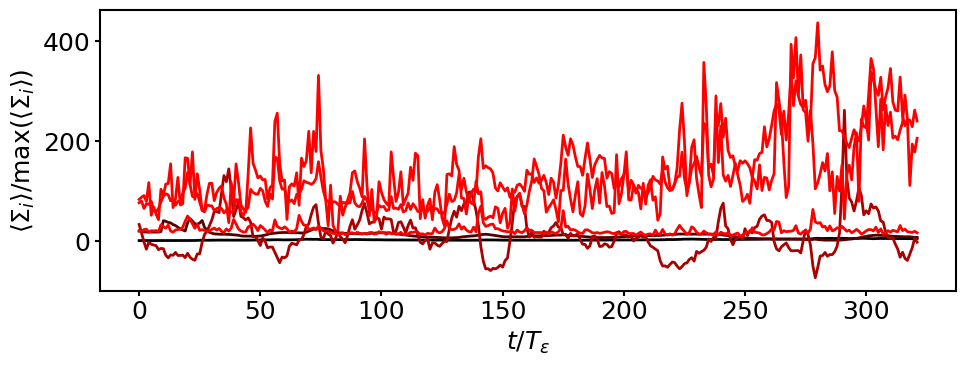

In [32]:

# Create a figure with subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

# Create a custom colormap from black to red
colors = [(0, 0, 0), (1, 0, 0)]  # Black to Red
n_bins = 4  # Increase this number for a smoother transition
cmap_name = 'my_black_red'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot each variable
for i in range(nvars):
    color = cm(i)  # Get color from colormap
    axs.plot(time,X[i, :], color=color, linewidth=2)

# axs.set_xlim(0, 5)  # Set x-axis limits
# axs.set_ylim(0.3, 0.9)  # Set x-axis limits
axs.set_ylabel(f'$\\langle\Sigma_i\\rangle / \\max\\left( \\langle\Sigma_i\\rangle \\right)$')
axs.set_xlabel(f'$t/T_\\varepsilon$')

# Adjust layout
plt.tight_layout()

# change all spines
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(1.5)

# increase tick width
axs.tick_params(width=1.5)

# Show plot
plt.show()

Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
La

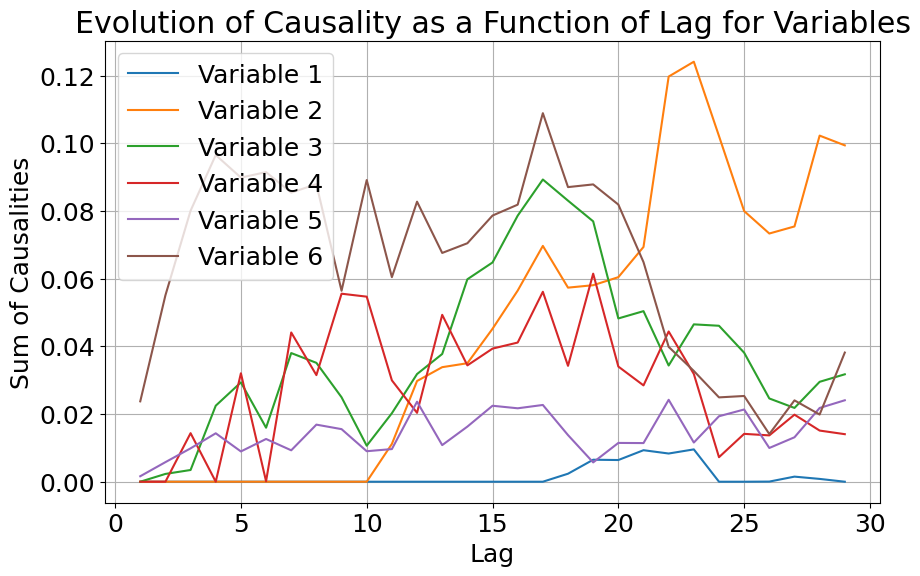

In [33]:
# Define the range of nlag values
nlags_range = range(1, 30, 1)

# Initialize a dictionary to store results
unique_lag = {i: [] for i in range(nvars)}

for i in range(nvars):
    for nlag in nlags_range:
        print(f"Lag {nlag}")

        # Prepare the data
        Y = np.vstack([X[i, nlag:], X[:, :-nlag]])
        hist, _ = np.histogramdd(Y.T, bins=nbins)
        I_R, I_S, MI, info_leak = surd.surd(hist)

        # Calculate the sum of causalities for single-digit tuples
        single_digit_keys = [key for key in I_R.keys() if len(key) == 1 and key != (i+1,)]
        sum_causalities = sum(I_R[key] for key in single_digit_keys)

        # Store the sum for this variable and nlag
        unique_lag[i].append(sum_causalities)

    print('\n')

# Plotting the results
plt.figure(figsize=(10, 6))
for var, sums in unique_lag.items():
    plt.plot(nlags_range, sums, label=f'Variable {var + 1}')

plt.xlabel('Lag')
plt.ylabel('Sum of Causalities')
plt.title('Evolution of Causality as a Function of Lag for Variables')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Select the time lags
nlags = np.array([23, 23, 17, 24, 22, 17])

# Storing the results
I_R_results = {}  # Dictionary to store redundant contributions
I_S_results = {}  # Dictionary to store synergistic contributions
MI_results = {}   # Dictionary to store mutual information results
info_leak_results = {}  # Dictionary to store information leak results

for i in range(nvars):
    print(f'SURD CAUSALITY FOR SIGNAL {i+1}')

    # Organize data (0 target variable, 1: agent variables)
    Y = np.vstack([X[i, nlags[i]:], X[:, :-nlags[i]]])

    # Run SURD
    hist, _ = np.histogramdd(Y.T, nbins)
    I_R, I_S, MI, info_leak = surd.surd(hist)

    # Print results
    surd.nice_print(I_R, I_S, MI, info_leak)
    print('\n')

    # Save the results
    I_R_results[i+1] = I_R
    I_S_results[i+1] = I_S
    MI_results[i+1] = MI
    info_leak_results[i+1] = info_leak

# Save the results to a file
with open('/content/SURD/results/energy_cascade.pkl', 'wb') as file:
    pickle.dump({
        'I_R_results': I_R_results,
        'I_S_results': I_S_results,
        'MI_results': MI_results,
        'info_leak_results': info_leak_results
    }, file)

print("Results saved to '/content/SURD/results/energy_cascade.pkl'")

SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0012
        (1, 3)      : 0.0000
        (1, 4)      : 0.1345
        (1, 5)      : 0.0000
        (1, 6)      : 0.0000
        (2, 3)      : 0.0000
        (2, 4)      : 0.0000
        (2, 5)      : 0.0000
        (2, 6)      : 0.0000
        (3, 4)      : 0.0000
        (3, 5)      : 0.0000
        (3, 6)      : 0.0000
        (4, 5)      : 0.0000
        (4, 6)      : 0.0000
        (5, 6)      : 0.0000
        (1, 2, 3)   : 0.0000
        (1, 2, 4)   : 0.0617
        (1, 2, 5)   : 0.0000
        (1, 2, 6)   : 0.0000
        (1, 3, 4)   : 0.0000
        (1, 3, 5)   : 0.0000
        (1, 3, 6)   : 0.0000
        (1, 4, 5)   : 0.0000
        (1, 4, 6)   : 0.0426
        (1, 5, 6)   : 0.0000
        (2, 3, 4)   : 0.0000
        (2, 3, 5)   : 0.0000
        (2, 3, 6)   : 0.0000
        (2, 4, 5)   : 0.0000
        (2, 4, 6)   : 0.0000
        (2, 5, 6)   : 0.0000
        (3, 4, 5)   : 0.0000
        (3, 4, 6)   : 0.0

In [35]:
# Load the results in case the results have already been computed
with open('/content/SURD/results/energy_cascade.pkl', 'rb') as file:
    results = pickle.load(file)

I_R_results = results['I_R_results']
I_S_results = results['I_S_results']
MI_results = results['MI_results']
info_leak_results = results['info_leak_results']

In [36]:
I_S.values()

dict_values([np.float64(0.026644917181625403), np.float64(0.020018519713786244), np.float64(0.01362257848775289), np.float64(0.014506880951631648), np.float64(0.006160791820889643), np.float64(0.0), np.float64(0.0), np.float64(0.000717183913415164), np.float64(0.01102094706632616), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0036795091714481093), np.float64(0.0037315605683382984), np.float64(0.0008188159542540088), np.float64(0.011164077472648967), np.float64(0.013888780318067194), np.float64(0.010447270919760812), np.float64(0.01278696979960385), np.float64(0.0006904201416015061), np.float64(0.02205113610994165), np.float64(0.019286033018198936), np.float64(0.010559353445192885), np.float64(0.009551471523705678), np.float64(0.01452336591513482), np.float64(0.0), np.float64(0.0018022045366061067), np.float64(6.176698342228872e-06), np.float64(0.0016363755508598346), np.float64(0.0051565528723546625), np.float64(0.002441444987492545), np.float64(9.371154316395751e-05

In [37]:
sum(I_R.values())

np.float64(0.19059289973923768)

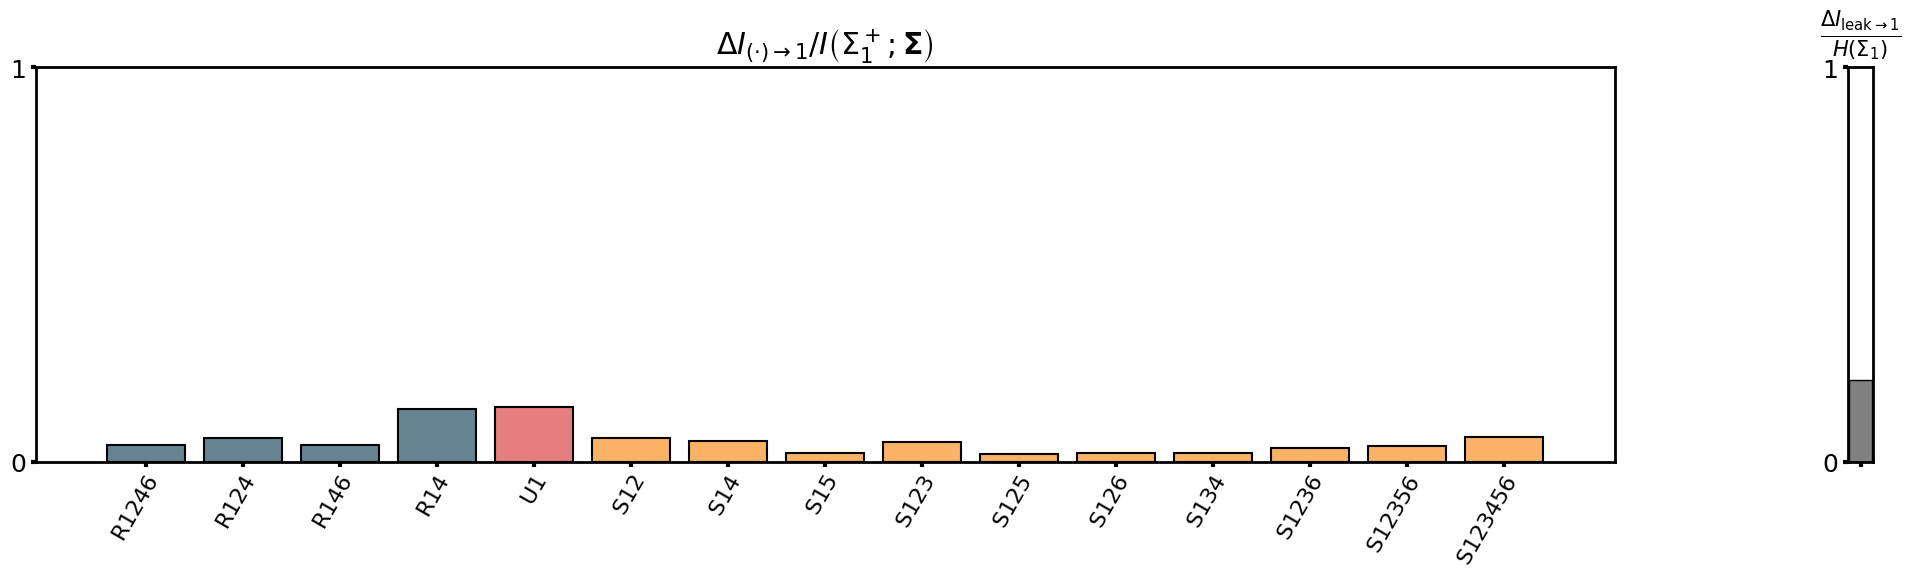

In [38]:
information_flux = {}

# Create figure for only the first row (1 pair of subplots)
fig, axs = plt.subplots(1, 2, figsize=(25, 6), gridspec_kw={'width_ratios': [nvars*18, 1]})
plt.rcParams.update({'font.size': 18})

i = 0  # First subplot only
I_R = I_R_results[i+1]
I_S = I_S_results[i+1]
MI = MI_results[i+1]
info_leak = info_leak_results[i+1]

information_flux[i+1] = surd.plot_nlabels(I_R, I_S, info_leak, axs, nvars, nlabels=15)

# Plot formatting
axs[0].set_title(f'${{\\Delta I}}_{{(\\cdot) \\rightarrow {i+1}}} / I \\left(\\Sigma_{i+1}^+ ; \\mathrm{{\\mathbf{{\\Sigma}}}} \\right)$', pad=10)
axs[1].set_title(f'$\\frac{{{{\\Delta I}}_{{\\mathrm{{leak}} \\rightarrow {i+1}}}}}{{H \\left(\\Sigma_{i+1} \\right)}}$', pad=17)
axs[1].set_yticks([0, 1])
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=16, rotation=60, ha='right', rotation_mode='anchor')

plt.tight_layout(w_pad=-15, h_pad=-0.1)
plt.show()


# Russia

In [8]:
import pandas as pd

fname = '/content/Russia_Data.xlsx'
df = pd.read_excel(fname)
df = df.drop(columns=['Date'])

In [9]:
df.head()

,spot_ER_Russia,SR_Interest_rate_diff_R_U,Oil_price_growth_rate_WTI,global_EPU(PPP),US_EMV,US_MPU
0,5.629,42.75,33.320298,76.652955,21.0498,83.390495
1,5.676,36.81,16.444206,80.081169,19.4810,87.818336
2,5.726,36.61,-1.696391,65.375401,22.9562,91.088722
3,5.762,30.49,-16.217887,74.742484,23.8621,79.398842
4,5.773,30.50,-1.939211,73.520737,17.6622,117.052849


In [10]:
df.columns

Index(['spot_ER_Russia', 'SR_Interest_rate_diff_R_U',
       'Oil_price_growth_rate_WTI', 'global_EPU(PPP)', 'US_EMV', 'US_MPU'],
      dtype='object')

In [11]:
selected_columns = df[['spot_ER_Russia', 'SR_Interest_rate_diff_R_U', 'Oil_price_growth_rate_WTI', 'global_EPU(PPP)', 'US_EMV', 'US_MPU']]

In [12]:
selected_columns

,spot_ER_Russia,SR_Interest_rate_diff_R_U,Oil_price_growth_rate_WTI,global_EPU(PPP),US_EMV,US_MPU
0,5.6290,42.75,33.320298,76.652955,21.0498,83.390495
1,5.6760,36.81,16.444206,80.081169,19.4810,87.818336
2,5.7260,36.61,-1.696391,65.375401,22.9562,91.088722
3,5.7620,30.49,-16.217887,74.742484,23.8621,79.398842
4,5.7730,30.50,-1.939211,73.520737,17.6622,117.052849
...,...,...,...,...,...,...
317,87.0341,2.42,-38.690856,243.784047,18.8323,244.500183
318,90.9783,3.38,-25.659260,241.793687,18.1060,111.290268
319,95.9283,6.67,-13.149383,229.010094,17.2802,194.223282
320,97.4147,7.67,5.735726,262.200783,19.5730,178.076874


In [13]:
data_df = selected_columns.transpose()
data_df

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
spot_ER_Russia,5.629000,5.676000,5.726000,5.762000,5.773000,5.782000,5.798000,5.830000,5.860000,5.887000,...,69.592700,75.432300,77.086300,80.509300,80.687200,87.034100,90.978300,95.928300,97.414700,93.243500
SR_Interest_rate_diff_R_U,42.750000,36.810000,36.610000,30.490000,30.500000,18.440000,18.480000,18.460000,18.460000,15.500000,...,3.170000,2.930000,2.850000,2.670000,2.440000,2.420000,3.380000,6.670000,7.670000,9.670000
Oil_price_growth_rate_WTI,33.320298,16.444206,-1.696391,-16.217887,-1.939211,-6.278613,-7.900267,-9.123537,-17.263602,-14.605741,...,-6.035542,-15.916186,-32.335010,-22.413771,-34.671683,-38.690856,-25.659260,-13.149383,5.735726,-2.082306
global_EPU(PPP),76.652955,80.081169,65.375401,74.742484,73.520737,79.764798,61.807509,58.759332,64.908260,78.469784,...,262.305447,260.533256,328.400322,249.848488,230.893213,243.784047,241.793687,229.010094,262.200783,240.391083
US_EMV,21.049800,19.481000,22.956200,23.862100,17.662200,20.716000,20.174400,20.949700,19.089400,32.702500,...,20.090200,18.826400,31.192400,21.043300,23.969000,18.832300,18.106000,17.280200,19.573000,16.609700
US_MPU,83.390495,87.818336,91.088722,79.398842,117.052849,51.748333,68.392830,53.869198,42.904366,103.629280,...,210.173523,202.834595,222.129196,237.338715,291.946167,244.500183,111.290268,194.223282,178.076874,205.754364


In [14]:
data = np.array(data_df)
data.shape

(6, 322)

In [16]:
X = data
nvars = X.shape[0]
nt = X.shape[1]
nbins = 4
nlag = 1

# Time
delta_t = 1 # 0.0076  # Time step (in units of Tε)
total_time = 322 # 165  # Total simulation time (in units of Tε)
time = np.arange(0, nt * delta_t, delta_t)

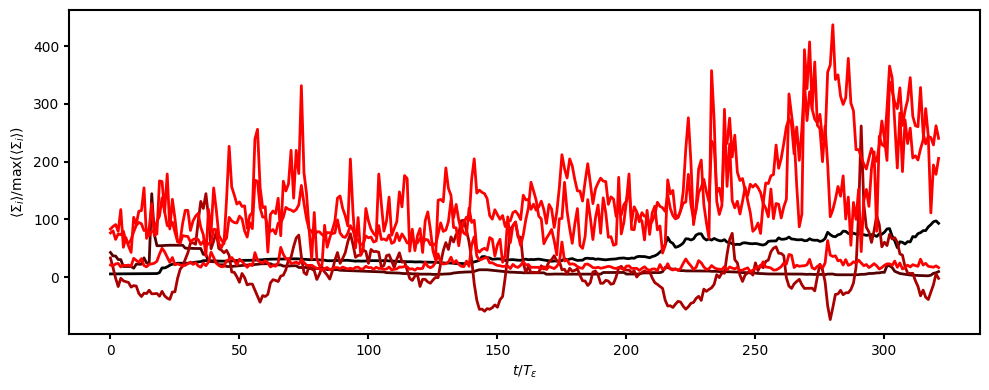

In [17]:

# Create a figure with subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

# Create a custom colormap from black to red
colors = [(0, 0, 0), (1, 0, 0)]  # Black to Red
n_bins = 4  # Increase this number for a smoother transition
cmap_name = 'my_black_red'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot each variable
for i in range(nvars):
    color = cm(i)  # Get color from colormap
    axs.plot(time,X[i, :], color=color, linewidth=2)

# axs.set_xlim(0, 5)  # Set x-axis limits
# axs.set_ylim(0.3, 0.9)  # Set x-axis limits
axs.set_ylabel(f'$\\langle\Sigma_i\\rangle / \\max\\left( \\langle\Sigma_i\\rangle \\right)$')
axs.set_xlabel(f'$t/T_\\varepsilon$')

# Adjust layout
plt.tight_layout()

# change all spines
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(1.5)

# increase tick width
axs.tick_params(width=1.5)

# Show plot
plt.show()

Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
La

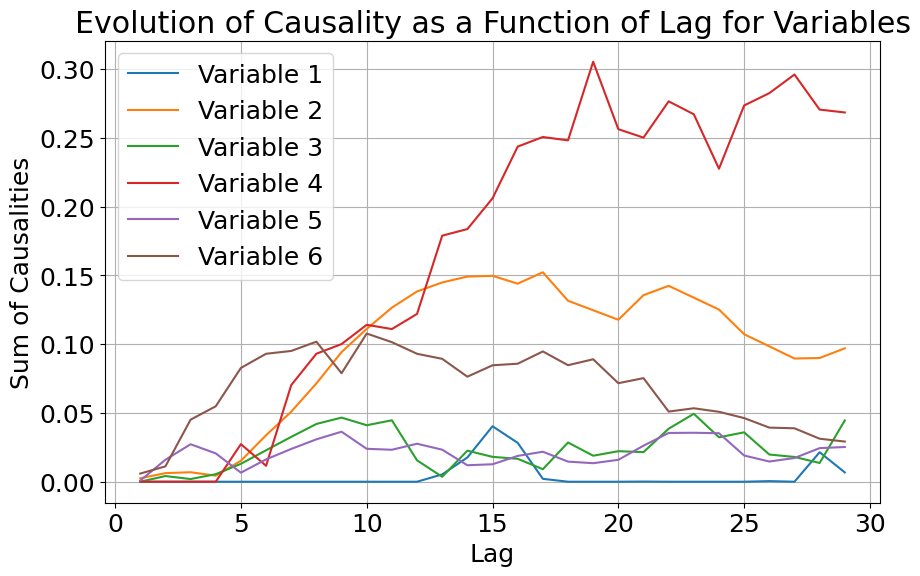

In [ ]:
# Define the range of nlag values
nlags_range = range(1, 30, 1)

# Initialize a dictionary to store results
unique_lag = {i: [] for i in range(nvars)}

for i in range(nvars):
    for nlag in nlags_range:
        print(f"Lag {nlag}")

        # Prepare the data
        Y = np.vstack([X[i, nlag:], X[:, :-nlag]])
        hist, _ = np.histogramdd(Y.T, bins=nbins)
        I_R, I_S, MI, info_leak = surd.surd(hist)

        # Calculate the sum of causalities for single-digit tuples
        single_digit_keys = [key for key in I_R.keys() if len(key) == 1 and key != (i+1,)]
        sum_causalities = sum(I_R[key] for key in single_digit_keys)

        # Store the sum for this variable and nlag
        unique_lag[i].append(sum_causalities)

    print('\n')

# Plotting the results
plt.figure(figsize=(10, 6))
for var, sums in unique_lag.items():
    plt.plot(nlags_range, sums, label=f'Variable {var + 1}')

plt.xlabel('Lag')
plt.ylabel('Sum of Causalities')
plt.title('Evolution of Causality as a Function of Lag for Variables')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Select the time lags
nlags = np.array([15, 17, 23, 19, 23, 10])

# Storing the results
I_R_results = {}  # Dictionary to store redundant contributions
I_S_results = {}  # Dictionary to store synergistic contributions
MI_results = {}   # Dictionary to store mutual information results
info_leak_results = {}  # Dictionary to store information leak results

for i in range(nvars):
    print(f'SURD CAUSALITY FOR SIGNAL {i+1}')

    # Organize data (0 target variable, 1: agent variables)
    Y = np.vstack([X[i, nlags[i]:], X[:, :-nlags[i]]])

    # Run SURD
    hist, _ = np.histogramdd(Y.T, nbins)
    I_R, I_S, MI, info_leak = surd.surd(hist)

    # Print results
    surd.nice_print(I_R, I_S, MI, info_leak)
    print('\n')

    # Save the results
    I_R_results[i+1] = I_R
    I_S_results[i+1] = I_S
    MI_results[i+1] = MI
    info_leak_results[i+1] = info_leak

# Save the results to a file
with open('/content/SURD/results/energy_cascade.pkl', 'wb') as file:
    pickle.dump({
        'I_R_results': I_R_results,
        'I_S_results': I_S_results,
        'MI_results': MI_results,
        'info_leak_results': info_leak_results
    }, file)

print("Results saved to '/content/SURD/results/energy_cascade.pkl'")

SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (1, 4)      : 0.1754
        (1, 5)      : 0.0000
        (1, 6)      : 0.0000
        (2, 3)      : 0.0000
        (2, 4)      : 0.0000
        (2, 5)      : 0.0000
        (2, 6)      : 0.0000
        (3, 4)      : 0.0000
        (3, 5)      : 0.0000
        (3, 6)      : 0.0000
        (4, 5)      : 0.0000
        (4, 6)      : 0.0000
        (5, 6)      : 0.0000
        (1, 2, 3)   : 0.0000
        (1, 2, 4)   : 0.0026
        (1, 2, 5)   : 0.0000
        (1, 2, 6)   : 0.0000
        (1, 3, 4)   : 0.0000
        (1, 3, 5)   : 0.0000
        (1, 3, 6)   : 0.0000
        (1, 4, 5)   : 0.0000
        (1, 4, 6)   : 0.0684
        (1, 5, 6)   : 0.0000
        (2, 3, 4)   : 0.0000
        (2, 3, 5)   : 0.0000
        (2, 3, 6)   : 0.0000
        (2, 4, 5)   : 0.0000
        (2, 4, 6)   : 0.0000
        (2, 5, 6)   : 0.0000
        (3, 4, 5)   : 0.0000
        (3, 4, 6)   : 0.0

In [19]:
# Load the results in case the results have already been computed
with open('/content/SURD/results/energy_cascade.pkl', 'rb') as file:
    results = pickle.load(file)

I_R_results = results['I_R_results']
I_S_results = results['I_S_results']
MI_results = results['MI_results']
info_leak_results = results['info_leak_results']

In [20]:
I_S.values()

dict_values([np.float64(0.006524603578087286), np.float64(0.016914315192477016), np.float64(0.02200826458224057), np.float64(0.013190456143139476), np.float64(0.013492695900020776), np.float64(0.0041295476832170965), np.float64(0.0), np.float64(0.0), np.float64(0.0007431388030878307), np.float64(0.002064279905772065), np.float64(0.0035285171429392), np.float64(0.0021759870886374896), np.float64(0.0), np.float64(0.0005139292455800643), np.float64(0.0019533982834488185), np.float64(0.005995552677633723), np.float64(0.0), np.float64(0.0), np.float64(0.004444920730281442), np.float64(0.024162406766756385), np.float64(0.007605399129834466), np.float64(0.04517043682943466), np.float64(0.008455038248758186), np.float64(0.017126177997385198), np.float64(0.008306951204808144), np.float64(0.0006961103818810834), np.float64(0.002330056605507171), np.float64(0.0007782070478460581), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0004105391747380949), np.float64(0.018167019474018387

In [21]:
sum(I_R.values())

np.float64(0.21326486473039902)

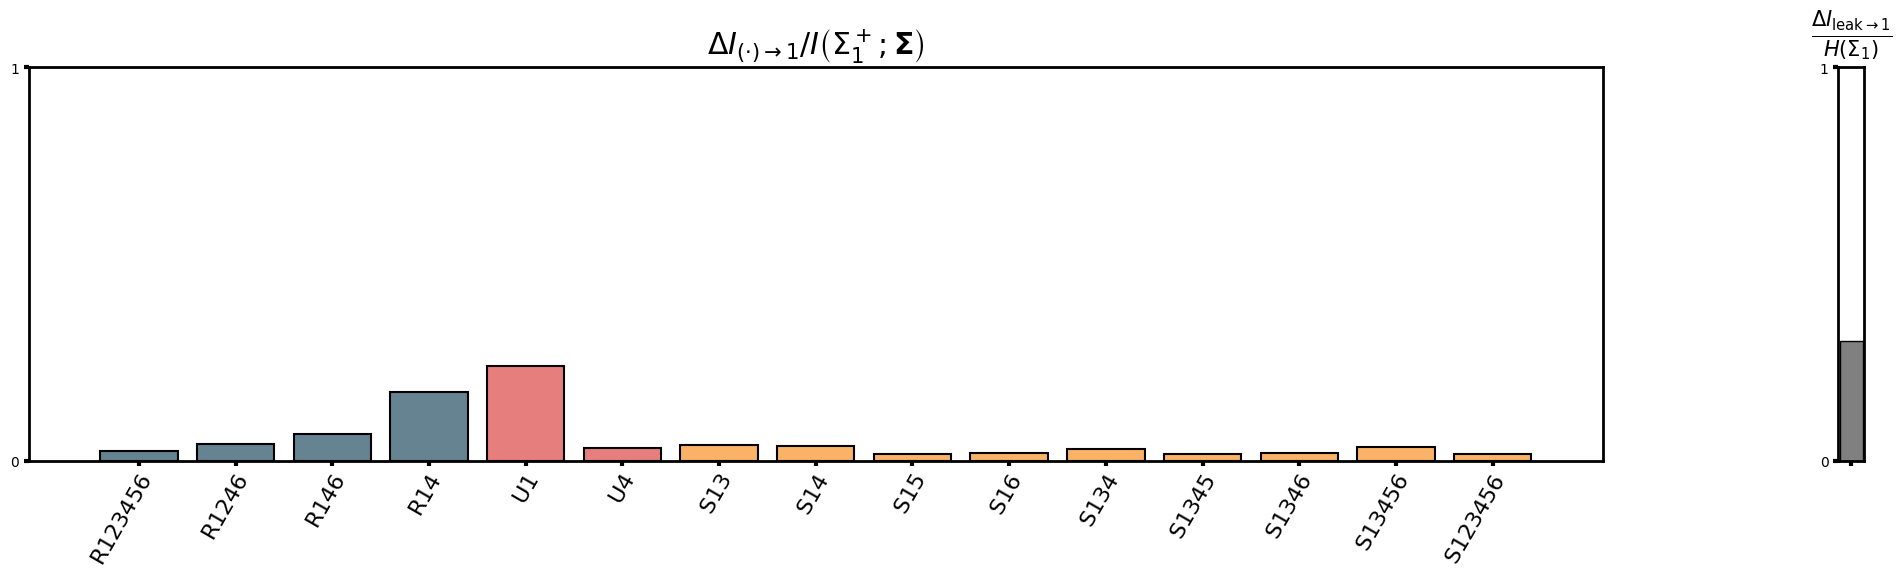

In [22]:
information_flux = {}

# Create figure for only the first row (1 pair of subplots)
fig, axs = plt.subplots(1, 2, figsize=(25, 6), gridspec_kw={'width_ratios': [nvars*18, 1]})
plt.rcParams.update({'font.size': 18})

i = 0  # First subplot only
I_R = I_R_results[i+1]
I_S = I_S_results[i+1]
MI = MI_results[i+1]
info_leak = info_leak_results[i+1]

information_flux[i+1] = surd.plot_nlabels(I_R, I_S, info_leak, axs, nvars, nlabels=15)

# Plot formatting
axs[0].set_title(f'${{\\Delta I}}_{{(\\cdot) \\rightarrow {i+1}}} / I \\left(\\Sigma_{i+1}^+ ; \\mathrm{{\\mathbf{{\\Sigma}}}} \\right)$', pad=10)
axs[1].set_title(f'$\\frac{{{{\\Delta I}}_{{\\mathrm{{leak}} \\rightarrow {i+1}}}}}{{H \\left(\\Sigma_{i+1} \\right)}}$', pad=17)
axs[1].set_yticks([0, 1])
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=16, rotation=60, ha='right', rotation_mode='anchor')

plt.tight_layout(w_pad=-15, h_pad=-0.1)
plt.show()


# India

In [39]:
import pandas as pd

fname = '/content/India_Data.xlsx'
df = pd.read_excel(fname)
df = df.drop(columns=['Date'])

In [40]:
df.head()

,spot_ER_India,SR_Interest_rate_diff_I_U,Oil_price_growth_rate_WTI,global_EPU(PPP),US_EMV,US_MPU
0,35.9037,6.75,33.320298,76.652955,21.0498,83.390495
1,35.8905,6.81,16.444206,80.081169,19.4810,87.818336
2,35.8848,6.61,-1.696391,65.375401,22.9562,91.088722
3,35.8281,5.49,-16.217887,74.742484,23.8621,79.398842
4,35.8248,5.50,-1.939211,73.520737,17.6622,117.052849


In [41]:
df.columns

Index(['spot_ER_India', 'SR_Interest_rate_diff_I_U',
       'Oil_price_growth_rate_WTI', 'global_EPU(PPP)', 'US_EMV', 'US_MPU'],
      dtype='object')

In [42]:
selected_columns = df[['spot_ER_India', 'SR_Interest_rate_diff_I_U', 'Oil_price_growth_rate_WTI', 'global_EPU(PPP)', 'US_EMV', 'US_MPU']]

In [43]:
selected_columns

,spot_ER_India,SR_Interest_rate_diff_I_U,Oil_price_growth_rate_WTI,global_EPU(PPP),US_EMV,US_MPU
0,35.9037,6.75,33.320298,76.652955,21.0498,83.390495
1,35.8905,6.81,16.444206,80.081169,19.4810,87.818336
2,35.8848,6.61,-1.696391,65.375401,22.9562,91.088722
3,35.8281,5.49,-16.217887,74.742484,23.8621,79.398842
4,35.8248,5.50,-1.939211,73.520737,17.6622,117.052849
...,...,...,...,...,...,...
317,82.2252,1.67,-38.690856,243.784047,18.8323,244.500183
318,82.1565,1.63,-25.659260,241.793687,18.1060,111.290268
319,82.8122,1.42,-13.149383,229.010094,17.2802,194.223282
320,83.0700,1.42,5.735726,262.200783,19.5730,178.076874


In [44]:
data_df = selected_columns.transpose()
data_df

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
spot_ER_India,35.903700,35.890500,35.884800,35.828100,35.824800,35.820200,35.747400,36.008500,36.475600,36.302000,...,81.741000,82.599500,82.266500,81.968500,82.297700,82.225200,82.156500,82.812200,83.070000,83.216200
SR_Interest_rate_diff_I_U,6.750000,6.810000,6.610000,5.490000,5.500000,4.440000,4.480000,4.460000,4.460000,3.500000,...,2.170000,2.120000,2.100000,1.920000,1.690000,1.670000,1.630000,1.420000,1.420000,1.420000
Oil_price_growth_rate_WTI,33.320298,16.444206,-1.696391,-16.217887,-1.939211,-6.278613,-7.900267,-9.123537,-17.263602,-14.605741,...,-6.035542,-15.916186,-32.335010,-22.413771,-34.671683,-38.690856,-25.659260,-13.149383,5.735726,-2.082306
global_EPU(PPP),76.652955,80.081169,65.375401,74.742484,73.520737,79.764798,61.807509,58.759332,64.908260,78.469784,...,262.305447,260.533256,328.400322,249.848488,230.893213,243.784047,241.793687,229.010094,262.200783,240.391083
US_EMV,21.049800,19.481000,22.956200,23.862100,17.662200,20.716000,20.174400,20.949700,19.089400,32.702500,...,20.090200,18.826400,31.192400,21.043300,23.969000,18.832300,18.106000,17.280200,19.573000,16.609700
US_MPU,83.390495,87.818336,91.088722,79.398842,117.052849,51.748333,68.392830,53.869198,42.904366,103.629280,...,210.173523,202.834595,222.129196,237.338715,291.946167,244.500183,111.290268,194.223282,178.076874,205.754364


In [45]:
data = np.array(data_df)
data.shape

(6, 322)

In [46]:
X = data
nvars = X.shape[0]
nt = X.shape[1]
nbins = 4
nlag = 1

# Time
delta_t = 1 # 0.0076  # Time step (in units of Tε)
total_time = 322 # 165  # Total simulation time (in units of Tε)
time = np.arange(0, nt * delta_t, delta_t)

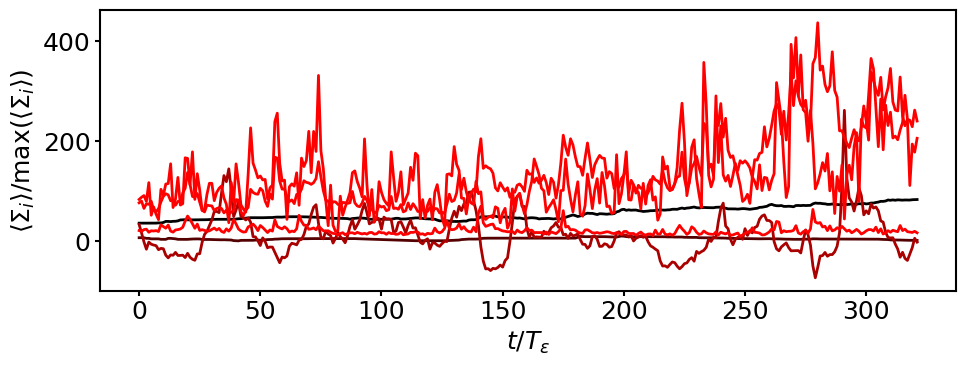

In [47]:

# Create a figure with subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

# Create a custom colormap from black to red
colors = [(0, 0, 0), (1, 0, 0)]  # Black to Red
n_bins = 4  # Increase this number for a smoother transition
cmap_name = 'my_black_red'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot each variable
for i in range(nvars):
    color = cm(i)  # Get color from colormap
    axs.plot(time,X[i, :], color=color, linewidth=2)

# axs.set_xlim(0, 5)  # Set x-axis limits
# axs.set_ylim(0.3, 0.9)  # Set x-axis limits
axs.set_ylabel(f'$\\langle\Sigma_i\\rangle / \\max\\left( \\langle\Sigma_i\\rangle \\right)$')
axs.set_xlabel(f'$t/T_\\varepsilon$')

# Adjust layout
plt.tight_layout()

# change all spines
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(1.5)

# increase tick width
axs.tick_params(width=1.5)

# Show plot
plt.show()

In [48]:
nvars

6

Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
La

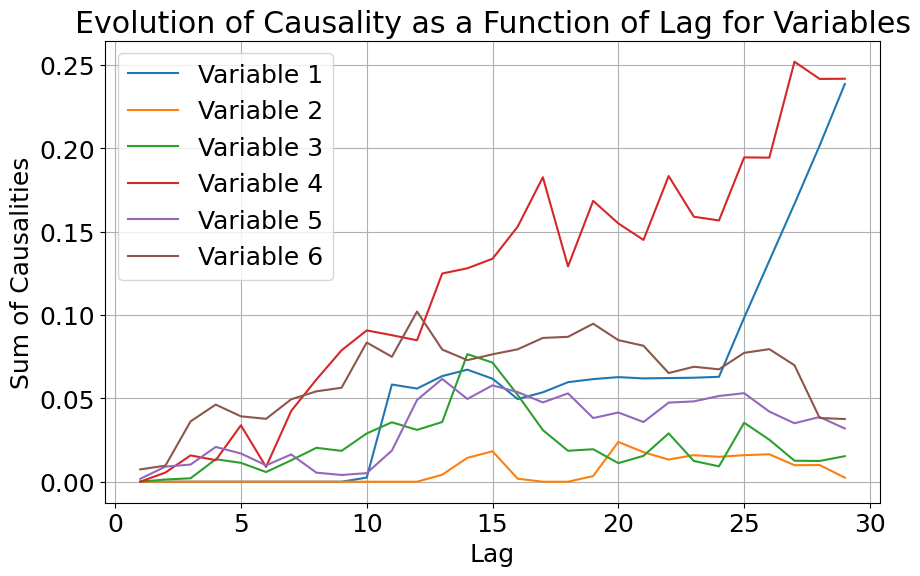

In [49]:
# Define the range of nlag values
nlags_range = range(1, 30, 1)

# Initialize a dictionary to store results
unique_lag = {i: [] for i in range(nvars)}

for i in range(nvars):
    for nlag in nlags_range:
        print(f"Lag {nlag}")

        # Prepare the data
        Y = np.vstack([X[i, nlag:], X[:, :-nlag]])
        hist, _ = np.histogramdd(Y.T, bins=nbins)
        I_R, I_S, MI, info_leak = surd.surd(hist)

        # Calculate the sum of causalities for single-digit tuples
        single_digit_keys = [key for key in I_R.keys() if len(key) == 1 and key != (i+1,)]
        sum_causalities = sum(I_R[key] for key in single_digit_keys)

        # Store the sum for this variable and nlag
        unique_lag[i].append(sum_causalities)

    print('\n')

# Plotting the results
plt.figure(figsize=(10, 6))
for var, sums in unique_lag.items():
    plt.plot(nlags_range, sums, label=f'Variable {var + 1}')

plt.xlabel('Lag')
plt.ylabel('Sum of Causalities')
plt.title('Evolution of Causality as a Function of Lag for Variables')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# Select the time lags
nlags = np.array([29, 20, 14, 27, 13, 12])

# Storing the results
I_R_results = {}  # Dictionary to store redundant contributions
I_S_results = {}  # Dictionary to store synergistic contributions
MI_results = {}   # Dictionary to store mutual information results
info_leak_results = {}  # Dictionary to store information leak results

for i in range(nvars):
    print(f'SURD CAUSALITY FOR SIGNAL {i+1}')

    # Organize data (0 target variable, 1: agent variables)
    Y = np.vstack([X[i, nlags[i]:], X[:, :-nlags[i]]])

    # Run SURD
    hist, _ = np.histogramdd(Y.T, nbins)
    I_R, I_S, MI, info_leak = surd.surd(hist)

    # Print results
    surd.nice_print(I_R, I_S, MI, info_leak)
    print('\n')

    # Save the results
    I_R_results[i+1] = I_R
    I_S_results[i+1] = I_S
    MI_results[i+1] = MI
    info_leak_results[i+1] = info_leak

# Save the results to a file
with open('/content/SURD/results/energy_cascade.pkl', 'wb') as file:
    pickle.dump({
        'I_R_results': I_R_results,
        'I_S_results': I_S_results,
        'MI_results': MI_results,
        'info_leak_results': info_leak_results
    }, file)

print("Results saved to '/content/SURD/results/energy_cascade.pkl'")

SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.1336
        (1, 3)      : 0.0000
        (1, 4)      : 0.0577
        (1, 5)      : 0.0000
        (1, 6)      : 0.0000
        (2, 3)      : 0.0000
        (2, 4)      : 0.0000
        (2, 5)      : 0.0000
        (2, 6)      : 0.0000
        (3, 4)      : 0.0000
        (3, 5)      : 0.0000
        (3, 6)      : 0.0000
        (4, 5)      : 0.0000
        (4, 6)      : 0.0000
        (5, 6)      : 0.0000
        (1, 2, 3)   : 0.0000
        (1, 2, 4)   : 0.1628
        (1, 2, 5)   : 0.0000
        (1, 2, 6)   : 0.0028
        (1, 3, 4)   : 0.0000
        (1, 3, 5)   : 0.0000
        (1, 3, 6)   : 0.0000
        (1, 4, 5)   : 0.0000
        (1, 4, 6)   : 0.0000
        (1, 5, 6)   : 0.0000
        (2, 3, 4)   : 0.0000
        (2, 3, 5)   : 0.0000
        (2, 3, 6)   : 0.0000
        (2, 4, 5)   : 0.0000
        (2, 4, 6)   : 0.0000
        (2, 5, 6)   : 0.0000
        (3, 4, 5)   : 0.0000
        (3, 4, 6)   : 0.0

In [51]:
# Load the results in case the results have already been computed
with open('/content/SURD/results/energy_cascade.pkl', 'rb') as file:
    results = pickle.load(file)

I_R_results = results['I_R_results']
I_S_results = results['I_S_results']
MI_results = results['MI_results']
info_leak_results = results['info_leak_results']

In [52]:
sum(I_S.values())

np.float64(0.6174162909143286)

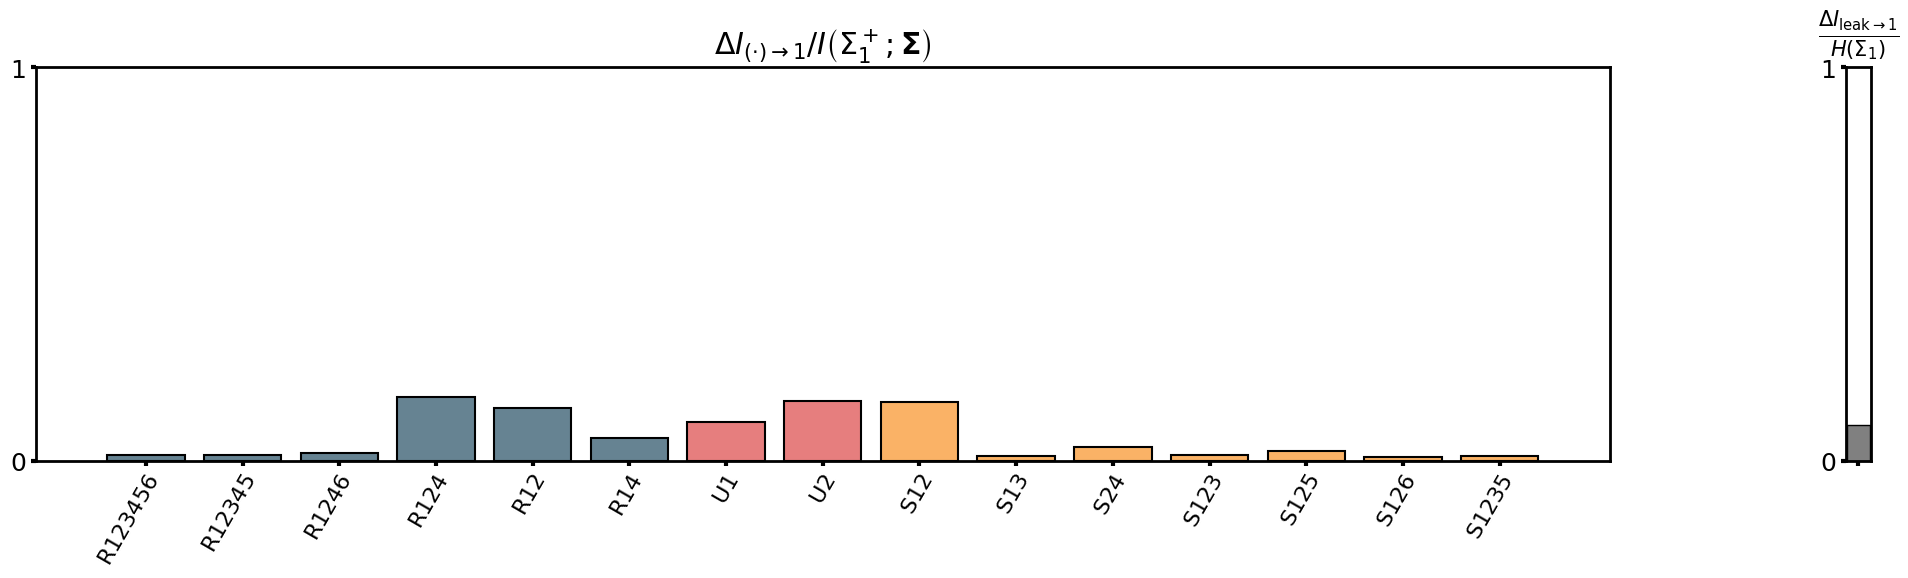

In [53]:
information_flux = {}

# Create figure for only the first row (1 pair of subplots)
fig, axs = plt.subplots(1, 2, figsize=(25, 6), gridspec_kw={'width_ratios': [nvars*18, 1]})
plt.rcParams.update({'font.size': 18})

i = 0  # First subplot only
I_R = I_R_results[i+1]
I_S = I_S_results[i+1]
MI = MI_results[i+1]
info_leak = info_leak_results[i+1]

information_flux[i+1] = surd.plot_nlabels(I_R, I_S, info_leak, axs, nvars, nlabels=15)

# Plot formatting
axs[0].set_title(f'${{\\Delta I}}_{{(\\cdot) \\rightarrow {i+1}}} / I \\left(\\Sigma_{i+1}^+ ; \\mathrm{{\\mathbf{{\\Sigma}}}} \\right)$', pad=10)
axs[1].set_title(f'$\\frac{{{{\\Delta I}}_{{\\mathrm{{leak}} \\rightarrow {i+1}}}}}{{H \\left(\\Sigma_{i+1} \\right)}}$', pad=17)
axs[1].set_yticks([0, 1])
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=16, rotation=60, ha='right', rotation_mode='anchor')

plt.tight_layout(w_pad=-15, h_pad=-0.1)
plt.show()


# China

In [54]:
import pandas as pd

fname = '/content/China_Data.xlsx'
df = pd.read_excel(fname)
df = df.drop(columns=['Date'])

In [55]:
df.head()

,spot_ER_China,SR_Interest_rate_diff_B_U,Oil_price_growth_rate_WTI,global_EPU(PPP),US_EMV,US_MPU
0,8.3260,3.75,33.320298,76.652955,21.0498,83.390495
1,8.3227,3.81,16.444206,80.081169,19.4810,87.818336
2,8.3258,3.61,-1.696391,65.375401,22.9562,91.088722
3,8.3257,3.04,-16.217887,74.742484,23.8621,79.398842
4,8.3229,0.89,-1.939211,73.520737,17.6622,117.052849


In [56]:
df.columns

Index(['spot_ER_China', 'SR_Interest_rate_diff_B_U',
       'Oil_price_growth_rate_WTI', 'global_EPU(PPP)', 'US_EMV', 'US_MPU'],
      dtype='object')

In [57]:
selected_columns = df[['spot_ER_China', 'SR_Interest_rate_diff_B_U', 'Oil_price_growth_rate_WTI', 'global_EPU(PPP)', 'US_EMV', 'US_MPU']]

In [58]:
selected_columns

,spot_ER_China,SR_Interest_rate_diff_B_U,Oil_price_growth_rate_WTI,global_EPU(PPP),US_EMV,US_MPU
0,8.3260,3.75,33.320298,76.652955,21.0498,83.390495
1,8.3227,3.81,16.444206,80.081169,19.4810,87.818336
2,8.3258,3.61,-1.696391,65.375401,22.9562,91.088722
3,8.3257,3.04,-16.217887,74.742484,23.8621,79.398842
4,8.3229,0.89,-1.939211,73.520737,17.6622,117.052849
...,...,...,...,...,...,...
317,7.1614,-5.08,-38.690856,243.784047,18.8323,244.500183
318,7.1863,-5.12,-25.659260,241.793687,18.1060,111.290268
319,7.2486,-5.33,-13.149383,229.010094,17.2802,194.223282
320,7.2979,-5.33,5.735726,262.200783,19.5730,178.076874


In [59]:
data_df = selected_columns.transpose()
data_df

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
spot_ER_China,8.326000,8.322700,8.325800,8.325700,8.322900,8.322400,8.316200,8.318700,8.317100,8.313500,...,6.790400,6.838000,6.890900,6.887600,6.985400,7.161400,7.186300,7.248600,7.297900,7.307100
SR_Interest_rate_diff_B_U,3.750000,3.810000,3.610000,3.040000,0.890000,0.830000,-0.300000,-0.950000,-0.950000,-2.260000,...,-4.330000,-4.570000,-4.650000,-4.830000,-5.060000,-5.080000,-5.120000,-5.330000,-5.330000,-5.330000
Oil_price_growth_rate_WTI,33.320298,16.444206,-1.696391,-16.217887,-1.939211,-6.278613,-7.900267,-9.123537,-17.263602,-14.605741,...,-6.035542,-15.916186,-32.335010,-22.413771,-34.671683,-38.690856,-25.659260,-13.149383,5.735726,-2.082306
global_EPU(PPP),76.652955,80.081169,65.375401,74.742484,73.520737,79.764798,61.807509,58.759332,64.908260,78.469784,...,262.305447,260.533256,328.400322,249.848488,230.893213,243.784047,241.793687,229.010094,262.200783,240.391083
US_EMV,21.049800,19.481000,22.956200,23.862100,17.662200,20.716000,20.174400,20.949700,19.089400,32.702500,...,20.090200,18.826400,31.192400,21.043300,23.969000,18.832300,18.106000,17.280200,19.573000,16.609700
US_MPU,83.390495,87.818336,91.088722,79.398842,117.052849,51.748333,68.392830,53.869198,42.904366,103.629280,...,210.173523,202.834595,222.129196,237.338715,291.946167,244.500183,111.290268,194.223282,178.076874,205.754364


In [60]:
data = np.array(data_df)
data.shape

(6, 322)

In [61]:
X = data
nvars = X.shape[0]
nt = X.shape[1]
nbins = 4
nlag = 1

# Time
delta_t = 1 # 0.0076  # Time step (in units of Tε)
total_time = 322 # 165  # Total simulation time (in units of Tε)
time = np.arange(0, nt * delta_t, delta_t)

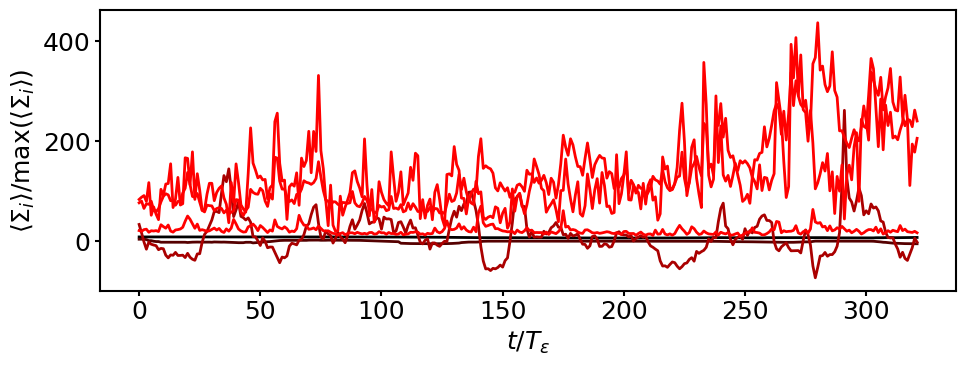

In [62]:

# Create a figure with subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

# Create a custom colormap from black to red
colors = [(0, 0, 0), (1, 0, 0)]  # Black to Red
n_bins = 4  # Increase this number for a smoother transition
cmap_name = 'my_black_red'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot each variable
for i in range(nvars):
    color = cm(i)  # Get color from colormap
    axs.plot(time,X[i, :], color=color, linewidth=2)

# axs.set_xlim(0, 5)  # Set x-axis limits
# axs.set_ylim(0.3, 0.9)  # Set x-axis limits
axs.set_ylabel(f'$\\langle\Sigma_i\\rangle / \\max\\left( \\langle\Sigma_i\\rangle \\right)$')
axs.set_xlabel(f'$t/T_\\varepsilon$')

# Adjust layout
plt.tight_layout()

# change all spines
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(1.5)

# increase tick width
axs.tick_params(width=1.5)

# Show plot
plt.show()

In [63]:
nvars

6

Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
Lag 9
Lag 10
Lag 11
Lag 12
Lag 13
Lag 14
Lag 15
Lag 16
Lag 17
Lag 18
Lag 19
Lag 20
Lag 21
Lag 22
Lag 23
Lag 24
Lag 25
Lag 26
Lag 27
Lag 28
Lag 29


Lag 1
Lag 2
Lag 3
La

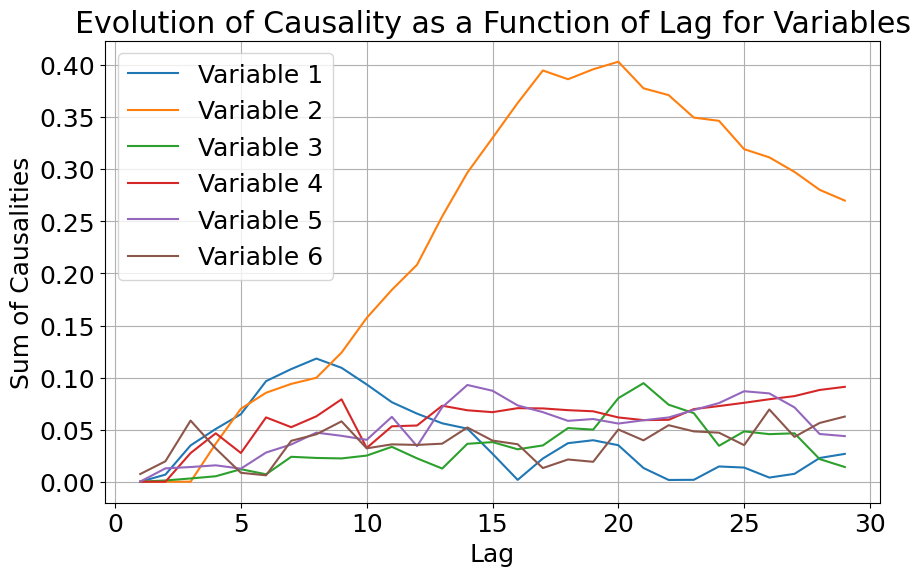

In [64]:
# Define the range of nlag values
nlags_range = range(1, 30, 1)

# Initialize a dictionary to store results
unique_lag = {i: [] for i in range(nvars)}

for i in range(nvars):
    for nlag in nlags_range:
        print(f"Lag {nlag}")

        # Prepare the data
        Y = np.vstack([X[i, nlag:], X[:, :-nlag]])
        hist, _ = np.histogramdd(Y.T, bins=nbins)
        I_R, I_S, MI, info_leak = surd.surd(hist)

        # Calculate the sum of causalities for single-digit tuples
        single_digit_keys = [key for key in I_R.keys() if len(key) == 1 and key != (i+1,)]
        sum_causalities = sum(I_R[key] for key in single_digit_keys)

        # Store the sum for this variable and nlag
        unique_lag[i].append(sum_causalities)

    print('\n')

# Plotting the results
plt.figure(figsize=(10, 6))
for var, sums in unique_lag.items():
    plt.plot(nlags_range, sums, label=f'Variable {var + 1}')

plt.xlabel('Lag')
plt.ylabel('Sum of Causalities')
plt.title('Evolution of Causality as a Function of Lag for Variables')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Select the time lags
nlags = np.array([8, 20, 21, 29, 14, 26])

# Storing the results
I_R_results = {}  # Dictionary to store redundant contributions
I_S_results = {}  # Dictionary to store synergistic contributions
MI_results = {}   # Dictionary to store mutual information results
info_leak_results = {}  # Dictionary to store information leak results

for i in range(nvars):
    print(f'SURD CAUSALITY FOR SIGNAL {i+1}')

    # Organize data (0 target variable, 1: agent variables)
    Y = np.vstack([X[i, nlags[i]:], X[:, :-nlags[i]]])

    # Run SURD
    hist, _ = np.histogramdd(Y.T, nbins)
    I_R, I_S, MI, info_leak = surd.surd(hist)

    # Print results
    surd.nice_print(I_R, I_S, MI, info_leak)
    print('\n')

    # Save the results
    I_R_results[i+1] = I_R
    I_S_results[i+1] = I_S
    MI_results[i+1] = MI
    info_leak_results[i+1] = info_leak

# Save the results to a file
with open('/content/SURD/results/energy_cascade.pkl', 'wb') as file:
    pickle.dump({
        'I_R_results': I_R_results,
        'I_S_results': I_S_results,
        'MI_results': MI_results,
        'info_leak_results': info_leak_results
    }, file)

print("Results saved to '/content/SURD/results/energy_cascade.pkl'")

SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.1075
        (1, 3)      : 0.0000
        (1, 4)      : 0.0604
        (1, 5)      : 0.0000
        (1, 6)      : 0.0000
        (2, 3)      : 0.0000
        (2, 4)      : 0.0000
        (2, 5)      : 0.0000
        (2, 6)      : 0.0000
        (3, 4)      : 0.0000
        (3, 5)      : 0.0000
        (3, 6)      : 0.0000
        (4, 5)      : 0.0000
        (4, 6)      : 0.0000
        (5, 6)      : 0.0000
        (1, 2, 3)   : 0.0000
        (1, 2, 4)   : 0.0573
        (1, 2, 5)   : 0.0001
        (1, 2, 6)   : 0.0000
        (1, 3, 4)   : 0.0000
        (1, 3, 5)   : 0.0000
        (1, 3, 6)   : 0.0000
        (1, 4, 5)   : 0.0000
        (1, 4, 6)   : 0.0000
        (1, 5, 6)   : 0.0000
        (2, 3, 4)   : 0.0000
        (2, 3, 5)   : 0.0000
        (2, 3, 6)   : 0.0000
        (2, 4, 5)   : 0.0000
        (2, 4, 6)   : 0.0000
        (2, 5, 6)   : 0.0000
        (3, 4, 5)   : 0.0000
        (3, 4, 6)   : 0.0

In [66]:
# Load the results in case the results have already been computed
with open('/content/SURD/results/energy_cascade.pkl', 'rb') as file:
    results = pickle.load(file)

I_R_results = results['I_R_results']
I_S_results = results['I_S_results']
MI_results = results['MI_results']
info_leak_results = results['info_leak_results']

In [67]:
sum(I_S.values())

np.float64(0.6363590928536589)

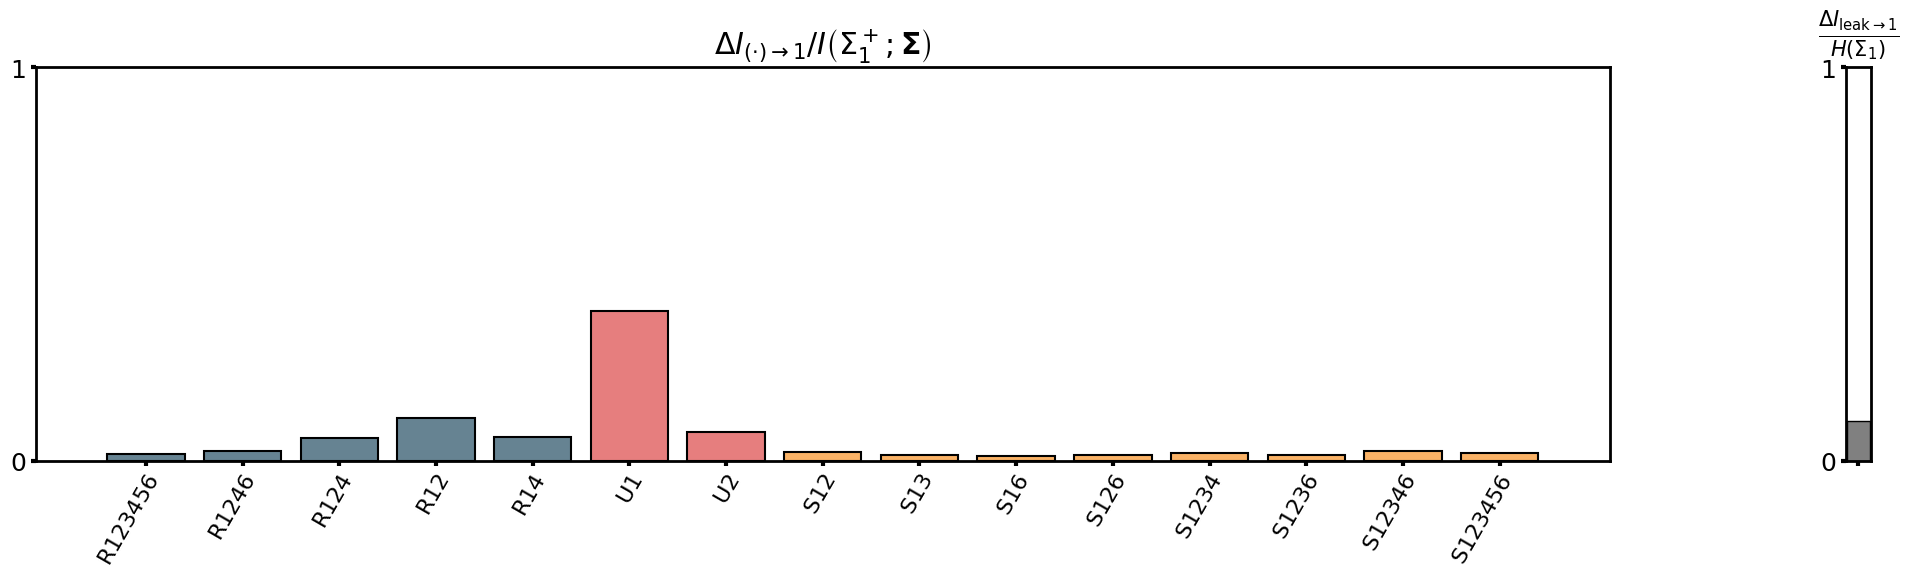

In [68]:
information_flux = {}

# Create figure for only the first row (1 pair of subplots)
fig, axs = plt.subplots(1, 2, figsize=(25, 6), gridspec_kw={'width_ratios': [nvars*18, 1]})
plt.rcParams.update({'font.size': 18})

i = 0  # First subplot only
I_R = I_R_results[i+1]
I_S = I_S_results[i+1]
MI = MI_results[i+1]
info_leak = info_leak_results[i+1]

information_flux[i+1] = surd.plot_nlabels(I_R, I_S, info_leak, axs, nvars, nlabels=15)

# Plot formatting
axs[0].set_title(f'${{\\Delta I}}_{{(\\cdot) \\rightarrow {i+1}}} / I \\left(\\Sigma_{i+1}^+ ; \\mathrm{{\\mathbf{{\\Sigma}}}} \\right)$', pad=10)
axs[1].set_title(f'$\\frac{{{{\\Delta I}}_{{\\mathrm{{leak}} \\rightarrow {i+1}}}}}{{H \\left(\\Sigma_{i+1} \\right)}}$', pad=17)
axs[1].set_yticks([0, 1])
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=16, rotation=60, ha='right', rotation_mode='anchor')

plt.tight_layout(w_pad=-15, h_pad=-0.1)
plt.show()
